<a href="https://colab.research.google.com/github/angulorojasmariaclaudia-coder/TRABAJO-FINAL-DE-PREPARACI-N-DE-DATOS/blob/main/Trabajo_Final_Preparaci%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
TRABAJO FINAL DE PREPARACIÓN DE DATOS
```



# **PREPARACIÓN Y SELECCIÓN DE DATOS PARA EL ANÁLISIS DE LA SEVERIDAD DE LOS DESASTRES NATURALES**

*Autora: Maria Claudia Angulo Rojas*

## I. Introducción

Los desastres naturales representan uno de los principales riesgos ambientales a nivel global y generan importantes consecuencias humanas, sociales y económicas. Analizar este tipo de fenómenos requiere trabajar con conjuntos de datos bien preparados, ya que la información disponible suele presentar problemas habituales como valores faltantes, valores extremos y una gran diversidad de variables.

En este trabajo se desarrolla un proceso de preparación y selección de datos aplicado a un conjunto de datos histórico de desastres naturales. El objetivo es obtener un dataset limpio y estructurado que permita analizar el impacto humano de los desastres, utilizando el número total de fallecidos como variable de referencia para definir posteriormente distintos niveles de severidad. Para ello, se aplican técnicas de exploración, limpieza, imputación, tratamiento de valores atípicos, codificación, escalado y selección de variables, siguiendo las buenas prácticas vistas en la asignatura y evitando posibles fugas de información.



> Librerias



In [41]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

## II. Descripción del Dataset



### 2.1. Fuente



El conjunto de datos utilizado proviene de la plataforma Kaggle (All Natural Disasters 1900–2021), y contiene información histórica sobre desastres naturales a nivel mundial, incluyendo distintos tipos de eventos y sus impactos humanos y económicos.

In [2]:
path = kagglehub.dataset_download(
    "brsdincer/all-natural-disasters-19002021-eosdis"
)

print("Ruta raíz del dataset:", path)
os.listdir(path)

100%|██████████| 2.31M/2.31M [00:00<00:00, 2.85MB/s]

Extracting files...


Ruta raíz del dataset: /root/.cache/kagglehub/datasets/brsdincer/all-natural-disasters-19002021-eosdis/versions/1


['DISASTERS']

In [3]:
disasters_path = os.path.join(path, "DISASTERS")
os.listdir(disasters_path)

['1970-2021_DISASTERS.xlsx - emdat data.csv',
 '1900_2021_DISASTERS.xlsx - emdat data.csv']

In [4]:
csv_path = os.path.join(
    disasters_path,
    "1900_2021_DISASTERS.xlsx - emdat data.csv"
)

df = pd.read_csv(csv_path, encoding="latin1")

### 2.2. Variables



El conjunto de datos está compuesto por variables numéricas que cuantifican el impacto de los desastres naturales, como el número de afectados, fallecidos y las pérdidas económicas, así como variables categóricas que describen el tipo de desastre y su localización geográfica (país y región). Además, incluye variables temporales asociadas al año de ocurrencia de los eventos.

In [5]:
# Dimensión del dataset
df.shape

(16126, 45)

In [6]:
# Tipos de variables
df.dtypes

,0
Year,int64
Seq,int64
Glide,object
Disaster Group,object
Disaster Subgroup,object
Disaster Type,object
Disaster Subtype,object
Disaster Subsubtype,object
Event Name,object
Country,object


A continuación se presenta una descripción resumida de las variables incluidas en el dataset, agrupadas por tipo de información:


> Variables temporales


* Year: Año de ocurrencia del desastre

* Start Year / Month / Day: Fecha de inicio del evento

* End Year / Month / Day: Fecha de finalización del evento

* Local Time: Hora local del evento

> Variables de identificación y clasificación del desastre

* Seq: Identificador secuencial del evento

* Glide: Código GLIDE del desastre

* Disaster Group: Grupo general del desastre

* Disaster Subgroup: Subgrupo del desastre

* Disaster Type: Tipo de desastre

* Disaster Subtype: Subtipo del desastre

* Disaster Subsubtype: Clasificación más específica del desastre

* Event Name: Nombre del evento

> Variables geográficas

* Country: País afectado

* ISO: Código ISO del país

* Region: Región geográfica

* Continent: Continente

* Location: Localización específica

* Latitude / Longitude: Coordenadas geográficas

* River Basin: Cuenca hidrográfica

> Variables administrativas y de respuesta

* Origin: Origen del desastre

* Associated Dis / Associated Dis2: Desastres asociados

* OFDA Response: Respuesta de OFDA

* Appeal: Llamado de ayuda internacional

* Declaration: Declaración oficial del desastre

* Adm Level: Nivel administrativo

* Admin1 Code / Admin2 Code: Códigos administrativos

* Geo Locations: Información geográfica administrativa

> Variables de impacto humano

* Total Deaths: Número total de fallecidos

* No Injured: Número de heridos

* No Affected: Número de personas afectadas

* No Homeless: Número de personas sin hogar

* Total Affected: Total de personas afectadas

> Variables de impacto económico

* Aid Contribution: Contribución de ayuda económica

* Insured Damages ('000 US$): Daños asegurados (miles de USD)

* Total Damages ('000 US$): Daños económicos totales (miles de USD)

* CPI: Índice de precios al consumidor

In [7]:
df.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


## III. Exploración Inicial

### 3.1. Descripción del dataset

Como primer paso, se realiza una exploración general del conjunto de datos con el objetivo de comprender su estructura, tamaño, tipos de variables e identificar las variables objetivo.

In [ ]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [ ]:
# Estadísticos descriptivos básicos
df.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,16126.000000,16126.000000,6.770000e+02,4.946000e+03,16126.00000,15739.000000,12498.000000,16126.000000,15418.000000,12570.000000,1.141300e+04,3.895000e+03,9.220000e+03,2.430000e+03,1.161700e+04,1.096000e+03,5.245000e+03,15811.000000
mean,1996.764790,714.784820,1.254136e+05,4.735038e+04,1996.77837,6.444374,15.233957,1996.835607,6.576728,15.775020,2.842866e+03,2.621102e+03,8.823612e+05,7.329314e+04,7.165088e+05,7.986514e+05,7.247835e+05,63.215103
std,20.159065,1929.635089,2.997875e+06,3.094242e+05,20.15571,3.393965,8.953821,20.143010,3.352965,8.865486,6.860595e+04,3.440343e+04,8.573913e+06,5.230058e+05,7.718598e+06,3.057638e+06,4.723131e+06,26.734285
min,1900.000000,1.000000,1.000000e+00,-5.700000e+01,1900.00000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,3.221647
25%,1989.000000,93.000000,1.750000e+02,7.000000e+00,1989.00000,4.000000,7.000000,1989.000000,4.000000,8.000000,6.000000e+00,1.400000e+01,1.244750e+03,5.725000e+02,6.500000e+02,5.000000e+04,8.300000e+03,45.692897
50%,2001.000000,270.000000,7.210000e+02,1.515000e+02,2001.00000,7.000000,15.000000,2001.000000,7.000000,16.000000,2.000000e+01,5.000000e+01,1.000000e+04,3.000000e+03,5.965000e+03,1.725000e+05,6.000000e+04,68.415379
75%,2011.000000,486.000000,3.511000e+03,1.129650e+04,2011.00000,9.000000,23.000000,2011.000000,9.000000,23.000000,6.300000e+01,2.000000e+02,9.182300e+04,1.750000e+04,5.825500e+04,5.000000e+05,3.173000e+05,84.252733
max,2021.000000,9881.000000,7.800000e+07,1.302587e+07,2021.00000,12.000000,31.000000,2021.000000,12.000000,31.000000,3.700000e+06,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,6.000000e+07,2.100000e+08,100.000000


### 3.2. Identificación de valores duplicados

El análisis no detecta registros duplicados en el conjunto de datos, por lo que no es necesario aplicar ninguna acción correctiva en esta etapa.

In [ ]:
# Número de filas duplicadas
df.duplicated().sum()

np.int64(0)

### 3.3. Análisis de valores faltantes

El análisis de valores faltantes permite identificar variables con información incompleta y evaluar su impacto potencial en el análisis. Se observa una presencia significativa de valores faltantes en varias variables, especialmente en aquellas relacionadas con detalles administrativos, geográficos y económicos, lo que justifica la aplicación posterior de distintas estrategias de imputación.

In [ ]:
# Valores faltantes por variable
df.isnull().sum()

,0
Year,0
Seq,0
Glide,14545
Disaster Group,0
Disaster Subgroup,0
Disaster Type,0
Disaster Subtype,3110
Disaster Subsubtype,15049
Event Name,12265
Country,0


### 3.4. Identificación de variables con baja información

Se evalúa la cantidad de valores únicos por variable con el fin de identificar variables con baja variabilidad o información limitada. Este análisis permite detectar variables que aportan poca capacidad explicativa y que podrían ser candidatas a ser descartadas o tratadas de forma específica en etapas posteriores del proceso.

In [ ]:
# Número de valores únicos por variable
df.nunique()

,0
Year,122
Seq,1274
Glide,1086
Disaster Group,1
Disaster Subgroup,6
Disaster Type,15
Disaster Subtype,27
Disaster Subsubtype,12
Event Name,1571
Country,228


### 3.5. Determinación de variable objetivo

La variable *Total Deaths* presenta una distribución fuertemente asimétrica, con una alta concentración de valores bajos y una cola larga asociada a eventos de gran impacto. Al tratarse de una variable numérica continua, no es apropiado evaluar su balanceo en esta etapa. No obstante, su comportamiento refleja una elevada heterogeneidad en el impacto humano de los desastres, lo que justifica su elección como variable base para definir posteriormente la severidad del evento mediante su discretización en categorías.

In [14]:
# Distribución de la variable objetivo
df["Total Deaths"].describe()

,Total Deaths
count,1.141300e+04
mean,2.842866e+03
std,6.860595e+04
min,1.000000e+00
25%,6.000000e+00
50%,2.000000e+01
75%,6.300000e+01
max,3.700000e+06


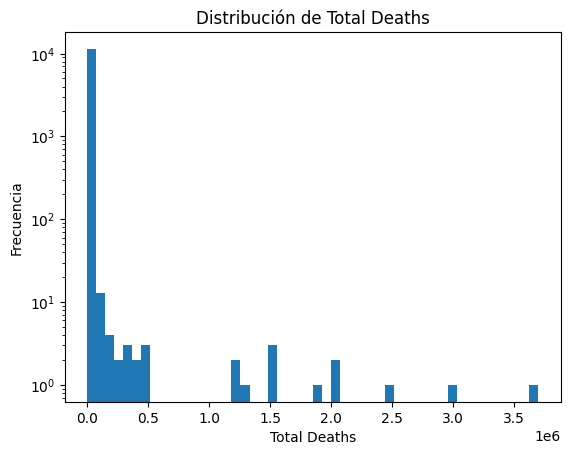

In [18]:
plt.hist(df["Total Deaths"].dropna(), bins=50)
plt.yscale("log")
plt.xlabel("Total Deaths")
plt.ylabel("Frecuencia")
plt.title("Distribución de Total Deaths")
plt.show()

## IV. Definición de los Modelos de Clasificación y Pipeline de Referencia

En este apartado se definen los modelos de clasificación, integrados en pipelines, que actuarán como referencia para evaluar el efecto de las distintas técnicas de tratamiento de datos, orientados a la **clasificación de la severidad de los desastres naturales en baja, media y alta**.

### 4.1. Prepararción del target (y) y separar X

In [20]:
df_model = df.copy().dropna(subset=["Total Deaths"])

df_model["SeverityClass"] = pd.qcut(df_model["Total Deaths"], q=3, labels=[0,1,2]).astype(int)

y = df_model["SeverityClass"]
X = df_model.drop(columns=["SeverityClass", "Total Deaths"])

### 4.2. Pipeline de modelos para comparar mejoras

In [22]:
# Detectar columnas numéricas y categóricas
num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(exclude=["number"]).columns

# Preprocesamiento
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_base = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ],
    remainder="drop"
)

# Evaluación de pipelines
pipelines = {
    "LR": Pipeline(steps=[
        ("prep", preprocess_base),
        ("clf", LogisticRegression(max_iter=2000))
    ]),
    "SVM": Pipeline(steps=[
        ("prep", preprocess_base),
        ("clf", SVC())
    ]),
    "RF": Pipeline(steps=[
        ("prep", preprocess_base),
        ("clf", RandomForestClassifier(random_state=42))
    ]),
    "GB": Pipeline(steps=[
        ("prep", preprocess_base),
        ("clf", GradientBoostingClassifier(random_state=42))
    ])
}

### 4.3. Comprobación inicial (accuracy)

In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for name, pipe in pipelines.items():
    acc = cross_val_score(pipe, X, y, cv=cv, scoring="accuracy").mean()
    results[name] = acc

pd.Series(results).sort_values(ascending=False)

,0
GB,0.625864
RF,0.623411
SVM,0.597301
LR,0.596688


**Interpretación:**

Los resultados muestran que los modelos de tipo ensemble, en particular Gradient Boosting y Random Forest, presentan un mejor rendimiento inicial, con valores de accuracy en torno al 62 %, mientras que los modelos lineales y SVM obtienen resultados ligeramente inferiores. Estos valores se utilizan como referencia para analizar el impacto de las posteriores técnicas de tratamiento y preparación de los datos.

## V. Tratamiento de Valores Faltantes

En este apartado se evalúa el impacto de un método de imputación más avanzado, basado en vecinos más cercanos (KNN), con el objetivo de analizar si una estimación multivariante de los valores faltantes mejora el rendimiento de los modelos frente a la imputación simple utilizada como línea base.

In [29]:
numeric_pipe_knn = Pipeline(steps=[
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
])

categorical_pipe_knn = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_knn = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_knn, num_cols),
        ("cat", categorical_pipe_knn, cat_cols)
    ]
)




> Evaluación



In [30]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results_knn = {}

for name, pipe in pipelines.items():
    pipe_knn = Pipeline(steps=[
        ("prep", preprocess_knn),
        ("clf", pipe.named_steps["clf"])
    ])
    acc = cross_val_score(pipe_knn, X, y, cv=cv, scoring="accuracy").mean()
    results_knn[name] = acc

pd.Series(results_knn).sort_values(ascending=False)

,0
RF,0.621221
GB,0.609918
SVM,0.599229
LR,0.590117


**Interpretación:**

La imputación mediante KNN no mejora el rendimiento de los modelos respecto a la imputación simple, manteniéndose Random Forest como el clasificador con mejor desempeño.

## VI. Análisis y Tratamiento de Outliers

En este apartado se analiza y trata la presencia de valores atípicos (outliers) en las variables numéricas, ya que pueden distorsionar el aprendizaje de los modelos y afectar su rendimiento.

In [32]:
# Transformer IQR
class IQRClipper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        X = np.asarray(X, dtype=float)
        q1 = np.nanpercentile(X, 25, axis=0)
        q3 = np.nanpercentile(X, 75, axis=0)
        iqr = q3 - q1
        self.lower_ = q1 - self.factor * iqr
        self.upper_ = q3 + self.factor * iqr
        return self

    def transform(self, X):
        X = np.asarray(X, dtype=float)
        return np.clip(X, self.lower_, self.upper_)

In [33]:
numeric_pipe_out = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("outliers", IQRClipper(factor=1.5)),
    ("scaler", StandardScaler())
])

categorical_pipe_out = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_outliers = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_out, num_cols),
        ("cat", categorical_pipe_out, cat_cols)
    ]
)



> Evaluación





In [34]:
results_out = {}

for name, pipe in pipelines.items():
    pipe_out = Pipeline(steps=[
        ("prep", preprocess_outliers),
        ("clf", pipe.named_steps["clf"])
    ])
    acc = cross_val_score(pipe_out, X, y, cv=cv, scoring="accuracy").mean()
    results_out[name] = acc

pd.Series(results_out).sort_values(ascending=False)

,0
GB,0.612371
SVM,0.609829
RF,0.606938
LR,0.598089


**Interpretación:**

El tratamiento de outliers no introduce mejoras relevantes en la accuracy, manteniéndose resultados similares a la línea base, lo que sugiere una limitada influencia de los valores atípicos en el rendimiento de los modelos.

## VII. Codificación de Variables Catégoricas

En este apartado se emplea inicialmente una codificación one-hot, integrada en el pipeline de preprocesamiento. Adicionalmente, se evalúa una variante de codificación tipo dummy con el objetivo de comprobar su impacto en el rendimiento de los modelos, manteniendo constante el resto del esquema de modelado.

In [38]:
categorical_pipe_dummy = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

numeric_pipe_base = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocess_dummy = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_base, num_cols),
        ("cat", categorical_pipe_dummy, cat_cols)
    ]
)



> Evaluación



In [39]:
results_dummy = {}

for name, pipe in pipelines.items():
    pipe_dummy = Pipeline(steps=[
        ("prep", preprocess_dummy),
        ("clf", pipe.named_steps["clf"])
    ])
    acc = cross_val_score(pipe_dummy, X, y, cv=cv, scoring="accuracy").mean()
    results_dummy[name] = acc

pd.Series(results_dummy).sort_values(ascending=False)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 4, 6, 7, 8, 11, 12, 14, 19, 20, 21, 22, 24, 25, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3, 4, 6, 7, 8, 11, 12, 13, 14, 19, 20, 21, 22, 24, 25, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5, 6, 7, 8, 11, 12, 19, 20, 21, 22, 24, 25, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 3, 6, 7, 8, 11, 12, 14, 19, 20, 21, 22, 24

,0
RF,0.627004
GB,0.625776
SVM,0.599404
LR,0.596600


**Interpretación:**

La codificación de variables categóricas no produce cambios relevantes en la accuracy, confirmando la idoneidad del enfoque one-hot utilizado.

## VIII. Escalado de Variables Numéricas

En este apartado se evalúa el impacto del escalado de las variables numéricas sobre el rendimiento de los modelos de clasificación. Se compara la estandarización mediante StandardScaler con una alternativa más robusta frente a valores atípicos basada en RobustScaler.

### 8.1. Variante 1: StandardScaler

In [40]:
numeric_pipe_std = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe_base = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_std = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_std, num_cols),
        ("cat", categorical_pipe_base, cat_cols)
    ]
)

### 8.2. Variante 2: RobustScaler

In [42]:
numeric_pipe_robust = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

preprocess_robust = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_robust, num_cols),
        ("cat", categorical_pipe_base, cat_cols)
    ]
)



> Evaluación



In [43]:
results_scaling = {}

for name, pipe in pipelines.items():
    # StandardScaler
    pipe_std = Pipeline(steps=[
        ("prep", preprocess_std),
        ("clf", pipe.named_steps["clf"])
    ])
    acc_std = cross_val_score(pipe_std, X, y, cv=cv, scoring="accuracy").mean()

    # RobustScaler
    pipe_rob = Pipeline(steps=[
        ("prep", preprocess_robust),
        ("clf", pipe.named_steps["clf"])
    ])
    acc_rob = cross_val_score(pipe_rob, X, y, cv=cv, scoring="accuracy").mean()

    results_scaling[name] = {
        "StandardScaler": acc_std,
        "RobustScaler": acc_rob
    }

pd.DataFrame(results_scaling).T

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,StandardScaler,RobustScaler
LR,0.596688,0.424252
SVM,0.597301,0.374223
RF,0.623411,0.623323
GB,0.625864,0.625951


**Interpretación:**

El escalado no afecta significativamente a los modelos basados en árboles, mientras que StandardScaler ofrece mejores resultados que RobustScaler en modelos sensibles a la escala.

## IX. Selección de Características

### 9.1. Selección de variables categoricas

En el caso de las variables categóricas, la selección de características se realiza tras la codificación one-hot. Se emplea un método de filtrado basado en la frecuencia mínima, eliminando aquellas categorías poco representativas que pueden introducir ruido y aumentar innecesariamente la dimensionalidad del problema.

In [44]:
categorical_pipe_fs = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(
        handle_unknown="ignore",
        min_frequency=0.01
    ))
])

preprocess_cat_fs = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_std, num_cols),
        ("cat", categorical_pipe_fs, cat_cols)
    ]
)



> Evaluación



In [45]:
results_cat_fs = {}

for name, pipe in pipelines.items():
    pipe_fs = Pipeline(steps=[
        ("prep", preprocess_cat_fs),
        ("clf", pipe.named_steps["clf"])
    ])
    acc = cross_val_score(pipe_fs, X, y, cv=cv, scoring="accuracy").mean()
    results_cat_fs[name] = acc

pd.Series(results_cat_fs).sort_values(ascending=False)

,0
RF,0.623061
GB,0.621395
SVM,0.592482
LR,0.583281


**Interpretación:**

La selección de variables categóricas no produce mejoras relevantes en la accuracy, manteniéndose los modelos basados en árboles como los más robustos.

### 9.2. Selección de variables númericas

Para las variables numéricas se aplica un método de selección por filtrado, basado en la variabilidad de las características. En concreto, se utiliza VarianceThreshold, eliminando aquellas variables con varianza cercana a cero.

In [46]:
numeric_pipe_var = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("var", VarianceThreshold(threshold=0.01))
])

preprocess_num_fs = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_var, num_cols),
        ("cat", categorical_pipe_base, cat_cols)
    ]
)



> Evaluación



In [47]:
results_num_fs = {}

for name, pipe in pipelines.items():
    pipe_fs = Pipeline(steps=[
        ("prep", preprocess_num_fs),
        ("clf", pipe.named_steps["clf"])
    ])
    acc = cross_val_score(pipe_fs, X, y, cv=cv, scoring="accuracy").mean()
    results_num_fs[name] = acc

pd.Series(results_num_fs).sort_values(ascending=False)

,0
GB,0.625864
RF,0.623411
SVM,0.597301
LR,0.596688


**Interpretación:**

La selección de variables numéricas no introduce mejoras significativas en la accuracy, confirmando la adecuación del conjunto original de variables.

### 9.3. Métodos envolventes: RFE e importancias

Se aplican métodos envolventes de selección de características, concretamente Recursive Feature Elimination (RFE) y selección basada en importancias mediante SelectFromModel. Estos métodos permiten identificar subconjuntos de variables relevantes en función del modelo empleado.




> a) RFE con Random Forest





In [ ]:
rfe = RFE(
    estimator=RandomForestClassifier(random_state=42),
    n_features_to_select=20
)

pipe_rfe = Pipeline(steps=[
    ("prep", preprocess_std),
    ("rfe", rfe),
    ("clf", RandomForestClassifier(random_state=42))
])

acc_rfe = cross_val_score(pipe_rfe, X, y, cv=cv, scoring="accuracy").mean()
acc_rfe

**Interpretación:**

La ejecución completa de RFE fue descartada debido a su elevado coste computacional, superando las dos horas de tiempo de ejecución, optándose por métodos alternativos basados en importancias de variables.



> b) Importancia de características (SelectFromModel)



In [50]:
sfm = SelectFromModel(
    RandomForestClassifier(random_state=42),
    max_features=20
)

pipe_sfm = Pipeline(steps=[
    ("prep", preprocess_std),
    ("fs", sfm),
    ("clf", RandomForestClassifier(random_state=42))
])

acc_sfm = cross_val_score(pipe_sfm, X, y, cv=cv, scoring="accuracy").mean()
acc_sfm

np.float64(0.5873996459753011)

**Interpretación:**

La selección de características mediante SelectFromModel no mejora la accuracy, sugiriendo que la información relevante está distribuida en un mayor número de variables.

## X. Comparación Global de Resultados

En este apartado se realiza una comparación global del rendimiento de los modelos de clasificación tras la aplicación de las distintas técnicas de tratamiento y preparación de datos.

In [53]:
df_scaling = pd.DataFrame(results_scaling).T

comparison_df = pd.DataFrame({
    "Base": results,
    "Valores faltantes": results_knn,
    "Outliers": results_out,
    "Escalado (Standard)": df_scaling["StandardScaler"],
    "Escalado (Robust)": df_scaling["RobustScaler"],
    "FS categóricas": results_cat_fs,
    "FS numéricas": results_num_fs
})

comparison_df

,Base,Valores faltantes,Outliers,Escalado (Standard),Escalado (Robust),FS categóricas,FS numéricas
LR,0.596688,0.590117,0.598089,0.596688,0.424252,0.583281,0.596688
SVM,0.597301,0.599229,0.609829,0.597301,0.374223,0.592482,0.597301
RF,0.623411,0.621221,0.606938,0.623411,0.623323,0.623061,0.623411
GB,0.625864,0.609918,0.612371,0.625864,0.625951,0.621395,0.625864


**Interpretación:**

Los resultados globales evidencian que Gradient Boosting y Random Forest son los modelos más robustos, manteniendo el mejor rendimiento independientemente del tratamiento aplicado, mientras que las técnicas adicionales de preparación de datos no generan mejoras significativas respecto a la línea base.

## XI. Selección del Modelo Final

A partir de los resultados obtenidos, se selecciona *Gradient Boosting* como modelo final, ya que es el que presenta de forma más consistente los mejores valores de accuracy a lo largo de los distintos escenarios evaluados. Además, su rendimiento se mantiene estable frente a los cambios en el preprocesamiento, lo que lo convierte en una opción robusta para este problema.

## XI. Conclusiones

En este trabajo se ha abordado un problema de clasificación supervisada aplicando distintas técnicas de preparación de datos. Los resultados muestran que, en este caso, los tratamientos adicionales no generan mejoras claras respecto a la línea base, y que los modelos basados en árboles ofrecen un comportamiento más estable que los modelos sensibles a la escala.

Asimismo, teniendo en cuenta que los valores de accuracy obtenidos, en torno al 60–63 %, son coherentes con la complejidad del problema y la naturaleza heterogénea de los datos. Lo cual indican que el modelo es capaz de capturar patrones relevantes, aunque existe un solapamiento natural entre las clases que limita el rendimiento máximo alcanzable.